<a href="https://colab.research.google.com/github/kngan79/learn-data-science/blob/master/EDA_Brazilian_E_commerce_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Loading

In [168]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import mode
from pandas.api.types import CategoricalDtype
from datetime import datetime
import calendar
%matplotlib inline
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [169]:
items = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/olist_order_items_dataset.csv",sep=",", header=0)
payments = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/olist_order_payments_dataset.csv",sep=",", header=0)
reviews = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/olist_order_reviews_dataset.csv",sep=",", header=0)
customers = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/olist_customers_dataset.csv",sep=",", header=0)
products = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/olist_products_dataset.csv",sep=",", header=0)
orders = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/olist_orders_dataset.csv",sep=",", header=0)
category = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/product_category_name_translation.csv",sep=",", header=0)
geolocation = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/olist_geolocation_dataset.csv",sep=",", header=0)
sellers = pd.read_csv("https://raw.githubusercontent.com/kngan79/learn-data-science/master/ecommerce_olist/olist_sellers_dataset.csv",sep=",", header=0)

In [170]:
final = pd.merge(orders,customers,on='customer_id')
final = pd.merge(final,reviews,on='order_id')
final = pd.merge(final,payments,on='order_id')
final = pd.merge(final,items,on='order_id')
final = pd.merge(final,products,on='product_id')
final = pd.merge(final,category,on='product_category_name')
final = pd.merge(final,sellers,on='seller_id')
#final = pd.merge(final,geolocation,on='seller_zip_code_prefix')
final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


##Data Exploratory

###Overview

In [171]:
final.shape

(116581, 40)

In [172]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   customer_id                    116581 non-null  object 
 2   order_status                   116581 non-null  object 
 3   order_purchase_timestamp       116581 non-null  object 
 4   order_approved_at              116567 non-null  object 
 5   order_delivered_carrier_date   115368 non-null  object 
 6   order_delivered_customer_date  114066 non-null  object 
 7   order_estimated_delivery_date  116581 non-null  object 
 8   customer_unique_id             116581 non-null  object 
 9   customer_zip_code_prefix       116581 non-null  int64  
 10  customer_city                  116581 non-null  object 
 11  customer_state                 116581 non-null  object 
 12  review_id                     

In [173]:
final.describe()

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116580.000000,116580.00000,116580.000000,116580.000000,116581.000000
mean,35053.391556,4.017507,1.093369,2.949614,172.910258,1.196953,120.751369,20.062550,48.766317,785.949331,2.204991,2115.560422,30.31858,16.645891,23.116898,24504.889030
std,29817.864821,1.397886,0.727240,2.783798,267.622516,0.701350,183.848421,15.845515,10.033728,652.614023,1.717417,3783.587898,16.22276,13.474741,11.758687,27625.157426
min,1003.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.00000,2.000000,6.000000,1001.000000
25%,11310.000000,4.000000,1.000000,1.000000,61.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.00000,8.000000,15.000000,6429.000000
50%,24315.000000,5.000000,1.000000,2.000000,108.190000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.00000,13.000000,20.000000,13690.000000
75%,58600.000000,5.000000,1.000000,4.000000,189.720000,1.000000,134.900000,21.220000,57.000000,983.000000,3.000000,1800.000000,38.00000,20.000000,30.000000,28495.000000
max,99980.000000,5.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.00000,105.000000,118.000000,99730.000000


In [174]:
#Numerical data
numerical_data = final.select_dtypes("number")
numerical_data

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
0,3149,4,1,1,18.12,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350
1,3149,4,3,1,2.00,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350
2,3149,4,2,1,18.59,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350
3,3366,4,1,3,37.77,1,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350
4,2290,5,1,1,37.77,1,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,88350,5,1,5,314.32,1,289.49,24.83,47.0,1002.0,3.0,1900.0,19.0,16.0,16.0,95910
116577,35930,5,1,7,77.50,1,57.90,19.60,53.0,923.0,5.0,1000.0,25.0,25.0,25.0,17201
116578,12305,5,1,1,24.69,1,11.90,12.79,29.0,654.0,3.0,200.0,16.0,6.0,16.0,17201
116579,9951,3,1,1,84.63,1,19.00,12.86,32.0,660.0,3.0,500.0,16.0,6.0,16.0,17201


In [175]:
#Non-numerical data
non_numerical_data = final.select_dtypes("object")
non_numerical_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_type,product_id,seller_id,shipping_limit_date,product_category_name,product_category_name_english,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,credit_card,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,utilidades_domesticas,housewares,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,voucher,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,utilidades_domesticas,housewares,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,voucher,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,utilidades_domesticas,housewares,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,credit_card,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,utilidades_domesticas,housewares,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,credit_card,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,utilidades_domesticas,housewares,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06 00:00:00,c5da6424f1f5decedef8672a1a0103e1,brusque,SC,a6a6d2f97b28e8aca22046635855fe63,Pedido entregue,Recebi em 3 dias muito rápido tudo perfeito pa...,2018-08-25 00:00:00,2018-08-27 16:43:30,credit_card,6bb18295cc019bf3b6dc7c773411d530,04ee0ec01589969663ba5967c0e0bdc0,2018-08-27 11:50:47,artes_e_artesanato,arts_and_craftmanship,lajeado,RS
116577,2c12150c742ae2fa48bc703964c16c5f,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,2018-08-03 17:46:46,2018-08-16 00:00:00,8c3c961a52bb5a0ffbce1d4e6d25cd67,joao monlevade,MG,6b7c670a784ae6d3f17ee1d4b28d197e,NaN,NaN,2018-08-04 00:00:00,2018-08-05 22:10:19,credit_card,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,artes_e_artesanato,arts_and_craftmanship,jau,SP
116578,9f7ba492c273ffac8f90a

In [176]:
#Numer of zeroes
(final == 0).sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
review_id                          0
review_score                       0
review_comment_title               0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
payment_sequential                 0
payment_type                       0
payment_installments               3
payment_value                      6
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
f

In [177]:
#Number of missing values
pd.isnull(final).sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


In [178]:
#Summary of datasets overview information
datasets = [customers, items, payments, orders, products, category, sellers, reviews]
titles = ["customers", "items", "payments", "orders", "products", "category", "sellers", "reviews"]

#To gather practical information about all datasets 
info_df = pd.DataFrame({},)
info_df['dataset']= titles
info_df['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]
info_df['cols_no']= [df.shape[1] for df in datasets]
info_df['null_no']= [df.isnull().sum().sum() for df in datasets]
info_df['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
info_df['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df.style.background_gradient(cmap='coolwarm')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
2,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
3,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,category,"product_category_name, product_category_name_english",2,0,0,
6,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",4,0,0,
7,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",7,146532,2,"review_comment_title, review_comment_message"


In [179]:
# Custom data dictionary
def generate_data_dict(final):
  mean = final.mean()
  median = final.median()
 # mode_value, mode_count = mode(final)
  std = final.std()
  count_distinct = final.nunique()
  n_missing = pd.isnull(final).sum()
  n_zeroes = (final == 0).sum()

  results = {
      "mean": mean,
      "median": median,
      #"mode": mode_value[0],
      "std": std,
      "count_distinct": count_distinct,
      "n_zeroes": n_zeroes
  }
 
  res_df = pd.DataFrame(results)
  return res_df

In [180]:
#generate_data_dict(final)

###Data cleaning

####Missing values

In [181]:
final.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'],inplace=True)
final.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'],inplace=True)

In [182]:
pd.isnull(final).sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             100392
review_comment_message            65834
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


In [183]:
final['review_comment_message'].fillna("mean",inplace=True)
final['review_comment_title'].fillna("mean",inplace=True)

In [184]:
pd.isnull(final).sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_nam

In [185]:
final[['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']]=final[['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

In [186]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114050 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114050 non-null  object        
 1   customer_id                    114050 non-null  object        
 2   order_status                   114050 non-null  object        
 3   order_purchase_timestamp       114050 non-null  datetime64[ns]
 4   order_approved_at              114050 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114050 non-null  datetime64[ns]
 6   order_delivered_customer_date  114050 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114050 non-null  datetime64[ns]
 8   customer_unique_id             114050 non-null  object        
 9   customer_zip_code_prefix       114050 non-null  int64         
 10  customer_city                  114050 non-null  object        
 11  

In [187]:
print('No. of unique customers in the data is %d'% final['customer_id'].nunique())
print('Unique customers fraction in the data is %f'% (final['customer_id'].nunique()/final.shape[0]))
print('No. of unique orders in the data is %d'% final['order_id'].nunique())
print('Unique orders fraction in the data is %f'% (final['order_id'].nunique()/final.shape[0]))


No. of unique customers in the data is 95109
Unique customers fraction in the data is 0.833924
No. of unique orders in the data is 95109
Unique orders fraction in the data is 0.833924


In [188]:
#Correlation between variables
def adding_colour(val):
  if val < 0:
    color = 'red'
  elif 0 < val < 1:
    color = 'green'
  else:
    color = 'black'      
  return 'color: %s' % color

corr_mat = final.corr().style.applymap(adding_colour) #apply a function to a dataframe
corr_mat

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
customer_zip_code_prefix,1.000000,-0.026614,-0.029259,0.057836,0.052727,-0.000613,0.041784,0.225402,0.016114,0.024314,0.021085,0.001062,0.003637,0.011660,-0.010161,0.074569
review_score,-0.026614,1.000000,0.005912,-0.043604,-0.083850,-0.138748,0.001905,-0.034318,-0.012916,0.013793,0.021490,-0.027440,-0.020896,-0.023751,-0.012334,0.026886
payment_sequential,-0.029259,0.005912,1.000000,-0.088019,-0.065459,-0.000863,0.000140,0.007617,-0.002240,-0.010511,-0.008421,0.025353,0.029856,0.019920,0.029783,0.004570
payment_installments,0.057836,-0.043604,-0.088019,1.000000,0.273855,0.074502,0.278473,0.186203,0.021244,0.035974,-0.000817,0.179232,0.116802,0.120890,0.137287,0.038137
payment_value,0.052727,-0.083850,-0.065459,0.273855,1.000000,0.267528,0.736304,0.372418,0.004450,0.157040,0.010337,0.305913,0.138342,0.216862,0.148574,0.069656
order_item_id,-0.000613,-0.138748,-0.000863,0.074502,0.267528,1.000000,-0.060427,-0.030461,-0.023447,-0.014270,-0.054132,-0.003413,0.005940,0.030487,-0.009114,-0.019483
price,0.041784,0.001905,0.000140,0.278473,0.736304,-0.060427,1.000000,0.415072,0.019810,0.200829,0.053278,0.340063,0.142909,0.223046,0.172966,0.088787
freight_value,0.225402,-0.034318,0.007617,0.186203,0.372418,-0.030461,0.415072,1.000000,0.025221,0.095033,0.022933,0.612278,0.303760,0.391575,0.322470,0.150772
product_name_lenght,0.016114,-0.012916,-0.002240,0.021244,0.004450,-0.023447,0.019810,0.025221,1.000000,0.090450,0.145157,0.022441,0.062426,-0.030314,0.063357,-0.032158
product_description_lenght,0.024314,0.013793,-0.010511,0.035974,0.157040,-0.014270,0.200829,0.095033,0.090450,1.000000,0.119185,0.059641,0.003391,0.073747,-0.069405,0.061123


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

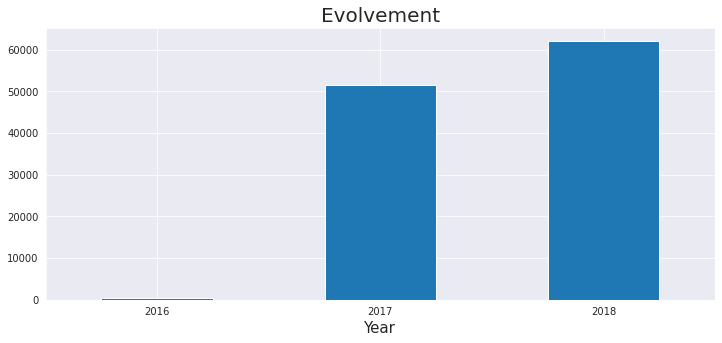

In [189]:
final['Year'] = final['order_purchase_timestamp'].dt.year
final.groupby('Year').size().plot(kind = 'bar',figsize=(12,5)) # size() is equivalent to counting the distinct rows 
plt.title('Evolvement',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=0)

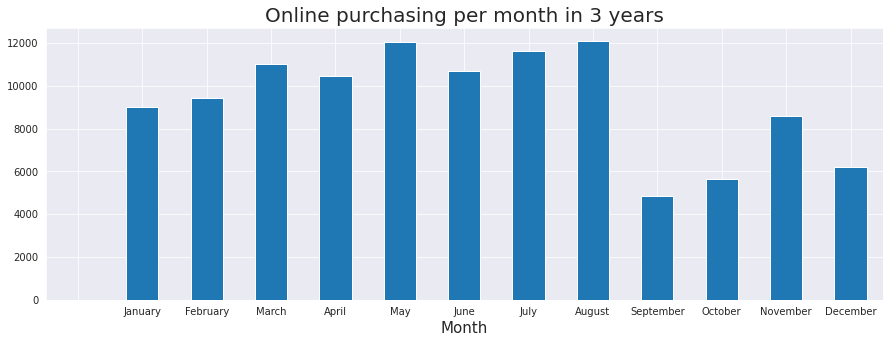

In [190]:
#To extract "year" from date
final['Month'] =  pd.Series(pd.Categorical(final['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
final['Month']
final.groupby('Month').size().plot(kind = 'bar',figsize=(15,5))
plt.title('Online purchasing per month in 3 years',fontsize=20);
plt.xlabel('Month',fontsize=15);
plt.xticks(rotation=0);

Text(0.5, 1.0, 'Months')

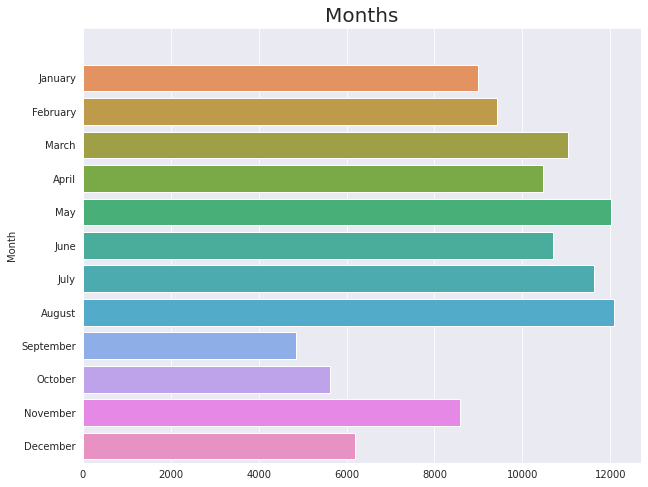

In [191]:
#Other way by seaborn
month = final.groupby('Month').size()
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=month.index, x=month.values)
plt.title('Months',fontsize=20)

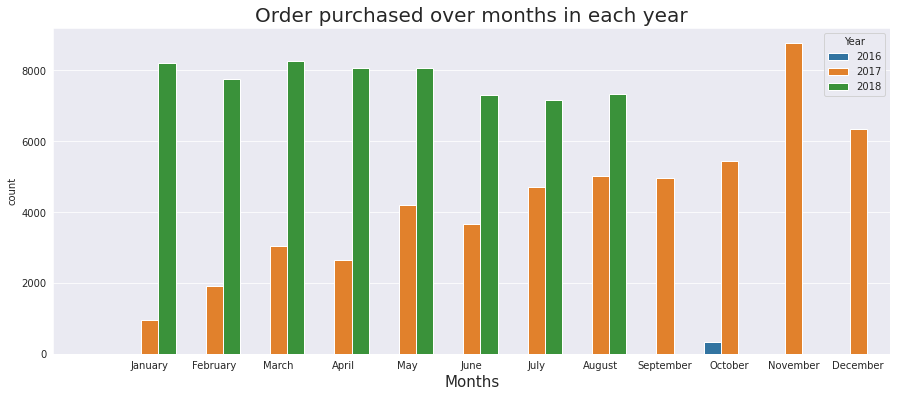

In [192]:
final['Month'] = final['order_purchase_timestamp'].dt.month_name()
plt.figure(figsize=(15,6))
sns.countplot(data=final,x='Month',hue='Year',order=list(calendar.month_name));
plt.title('Order purchased over months in each year', fontsize=20);
plt.xlabel('Months',fontsize=15);

In [193]:
#Group by month-year
final.groupby('Year').Month.value_counts()

Year  Month    
2016  October       339
      December        1
2017  November     8761
      December     6327
      October      5428
      August       5028
      September    4959
      July         4699
      May          4208
      June         3666
      March        3034
      April        2636
      February     1904
      January       966
2018  March        8247
      January      8215
      May          8059
      April        8047
      February     7744
      August       7320
      June         7300
      July         7162
Name: Month, dtype: int64

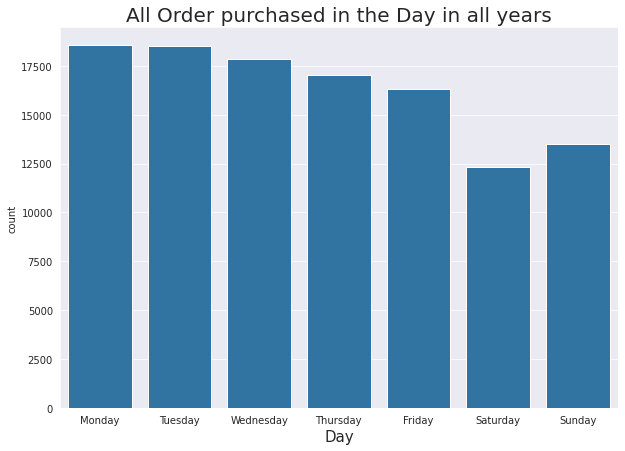

In [194]:
final['Day'] = final['order_purchase_timestamp'].dt.day_name()

plt.figure(figsize=(10,7))
basecolor=sns.color_palette()[0]
sns.countplot(data=final,x='Day',order=list(calendar.day_name),color=basecolor);

plt.title('All Order purchased in the Day in all years', fontsize=20);
plt.xlabel('Day',fontsize=15);

Top 10 Products

In [197]:
top10_category = final["product_category_name_english"].value_counts().head(10)
print('Top 10 product categories')
top10_category.reset_index().rename(columns={'index':'product_category','product_category_name_english':'counts'})

Top 10 product categories


,product_category,counts
0,bed_bath_table,11815
1,health_beauty,9816
2,sports_leisure,8790
3,furniture_decor,8640
4,computers_accessories,7963
5,housewares,7196
6,watches_gifts,6075
7,telephony,4605
8,garden_tools,4479
9,auto,4301


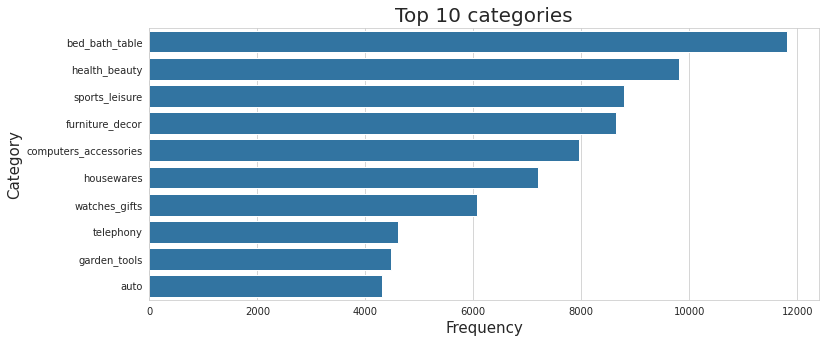

In [198]:
# Top 10 categories
fig=plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
sns.barplot(y=top10_category.index, x=top10_category.values,color = basecolor)
plt.title('Top 10 categories',fontsize=20);
plt.xlabel('Frequency',fontsize=15);
plt.ylabel('Category',fontsize=15);

In [199]:
#Average price on each category
average_price = final.groupby("product_category_name_english")["price"].agg(np.mean).sort_values(ascending=False).head(10)
print('*Top 10 categories with highest average prices')
average_price

*Top 10 categories with highest average prices


product_category_name_english
computers                                1104.317685
small_appliances_home_oven_and_coffee     641.194133
home_appliances_2                         449.200644
agro_industry_and_commerce                332.835691
musical_instruments                       295.714935
small_appliances                          283.506881
fixed_telephony                           214.020878
construction_tools_safety                 212.297366
watches_gifts                             199.891761
air_conditioning                          184.561156
Name: price, dtype: float64

In [200]:
average_price = final.groupby("product_category_name_english")["price"].agg(np.mean).sort_values(ascending=True).head(10)
print('*Top 10 categories with lowest average prices')
average_price

*Top 10 categories with lowest average prices


product_category_name_english
home_comfort_2            24.940968
flowers                   33.637576
diapers_and_hygiene       40.561892
cds_dvds_musicals         52.142857
food                      57.198408
electronics               57.597472
christmas_supplies        57.656974
food_drink                57.686548
fashio_female_clothing    58.713913
drinks                    59.091402
Name: price, dtype: float64

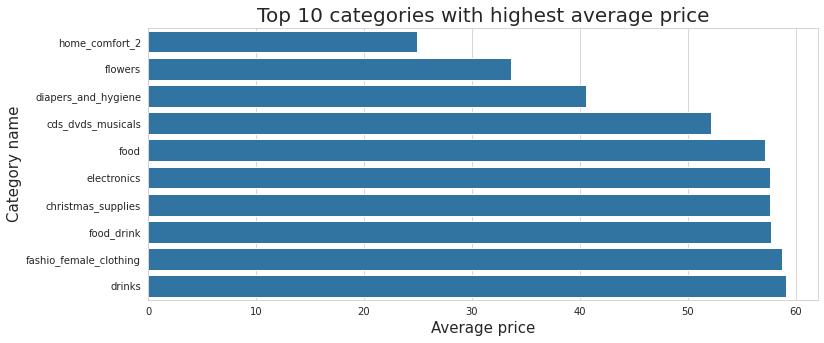

In [201]:
# Top 10 categories with highest average price.
fig=plt.figure(figsize=(12,5))
#sns.set_style("darkgrid")
sns.barplot(y=average_price.index, x=average_price.values,color=basecolor)
plt.title('Top 10 categories with highest average price',fontsize=20);
plt.xlabel('Average price',fontsize=15);
plt.ylabel('Category name',fontsize=15);

In [202]:
# Avergae prices of Top 10 frequently repeated categories
top_category = final[final['product_category_name_english'].isin(top10_category.index)]
price_top_category=round(top_category.groupby("product_category_name_english")["price"].agg(np.mean).sort_values(ascending=False), 2)


print('Average prices of Top 10 frequently repeated categories')
price_top_category.sort_values(ascending=False)

Average prices of Top 10 frequently repeated categories


product_category_name_english
watches_gifts            199.89
auto                     140.47
health_beauty            129.97
computers_accessories    116.35
sports_leisure           113.29
garden_tools             110.18
bed_bath_table            92.47
housewares                90.38
furniture_decor           87.16
telephony                 70.70
Name: price, dtype: float64

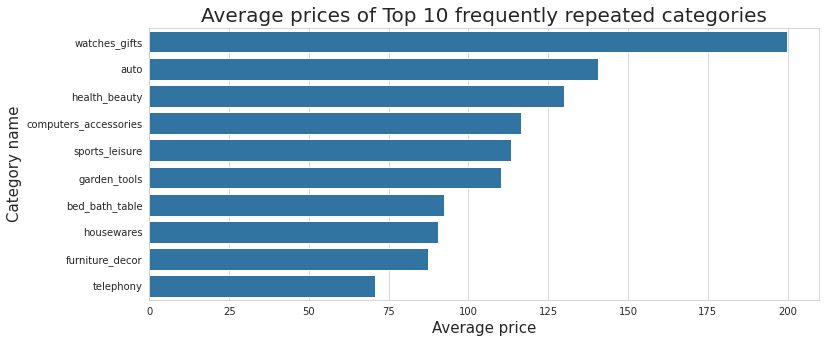

In [203]:
fig=plt.figure(figsize=(12,5))
sns.barplot(y=price_top_category.index, x=price_top_category.values,color=basecolor)
plt.title('Average prices of Top 10 frequently repeated categories',fontsize=20);
plt.xlabel('Average price',fontsize=15);
plt.ylabel('Category name',fontsize=15);

In [ ]:
fig=plt.figure(figsize=(15,10))

sns.boxplot(data=top_category,x='price',y='product_category_name_english',
           showfliers=False,color=basecolor);
plt.xlim(0,500);
plt.title('price distribution of the top 10 frequent Product category',fontsize=20)


plt.ylabel('Product category',fontsize=15)
plt.xlabel('Price',fontsize=15);
plt.yticks(fontsize=15);

####Payments

In [ ]:
#Methods of payment
print('There are %d methods of payment' %final.payment_type.nunique())
print('Those are %s' %final.payment_type.unique().tolist())

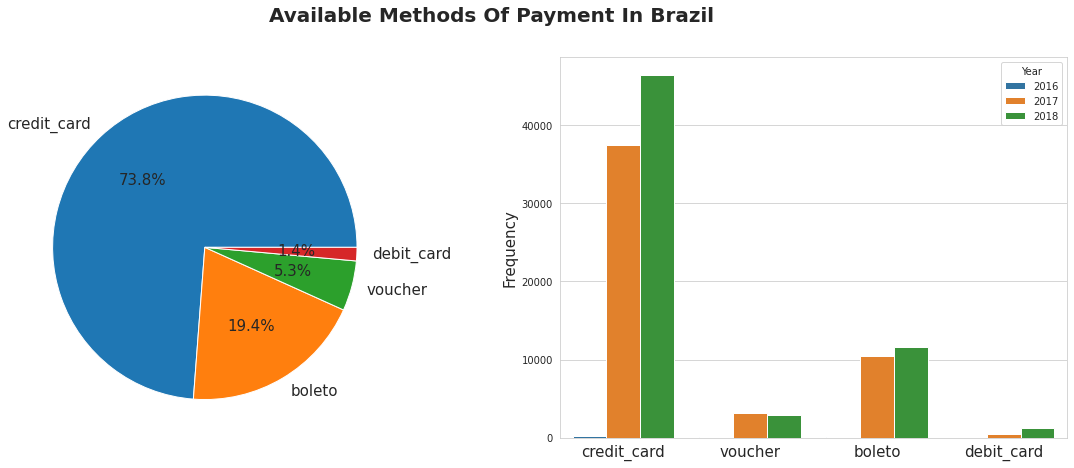

In [204]:
#Most frequent method of payment
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
plt.suptitle('Available Methods of Payment in Brazil'.title() , fontsize=20,fontweight='bold');

final["payment_type"].value_counts().plot(ax=ax1,
    kind="pie",
    autopct="%1.1f%%",
    fontsize=15)
ax1.axis('off');

sns.countplot(data=final,x='payment_type',hue='Year',ax=ax2);
plt.xlabel('');
plt.xticks(fontsize=15);
plt.ylabel('Frequency',fontsize=15);

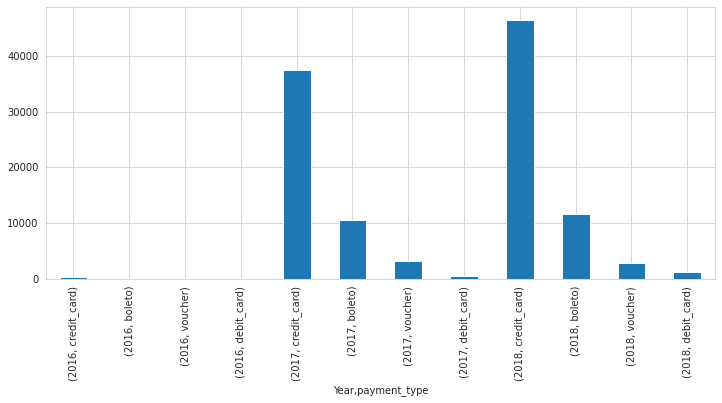

In [205]:
#Methods of payment frequency in each year
final.groupby("Year")['payment_type'].value_counts().plot(kind='bar',figsize=(12,5))

###Customers' States

In [206]:
#Customers distribution by State and 3 top States
states = final["customer_state"].value_counts()
states.head(3)

SP    48110
RJ    14736
MG    13308
Name: customer_state, dtype: int64

In [ ]:
#Plotting
fig=plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.barplot(y=states.index, x=states.values)
plt.title('Customer States',fontsize=20)

In [207]:
# delivery time in hour
final['delivery_time'] = (final['order_delivered_customer_date']- final['order_purchase_timestamp']).astype(int)/(60*60*10**9)


states = final["customer_state"].value_counts().reset_index().rename(
columns={'index':'customer_state','customer_state':'Total_orders'})

delivery_mean_state = final.groupby("customer_state")['delivery_time'].mean().reset_index().rename(
    columns={'delivery_time':'mean_derivery_time'})

delivery_std_state = final.groupby("customer_state")['delivery_time'].std().reset_index().rename(
    columns={'delivery_time':'std_derivery_time'})

data=states.merge(delivery_mean_state).merge(delivery_std_state)
data.head()

,customer_state,Total_orders,mean_derivery_time,std_derivery_time
0,SP,48110,209.641903,161.811070
1,RJ,14736,365.924110,271.242966
2,MG,13308,287.351621,169.519994
3,RS,6330,364.392295,221.157170
4,PR,5816,287.499435,167.936758


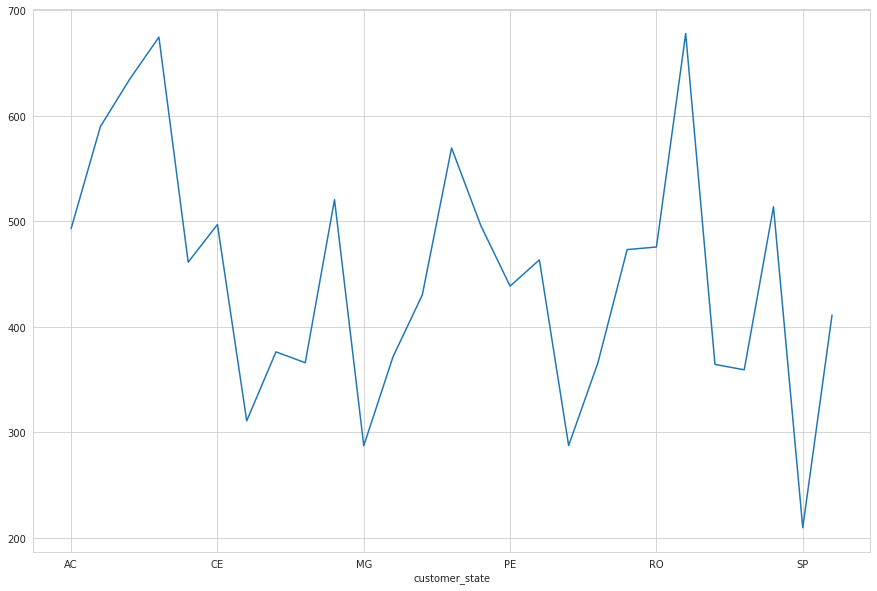

In [208]:
delivery_by_state = final.groupby("customer_state")['delivery_time'].mean()
delivery_by_state.plot(kind='line',figsize=(15,10))

Text(0, 0.5, 'Average Delivery time in hours')

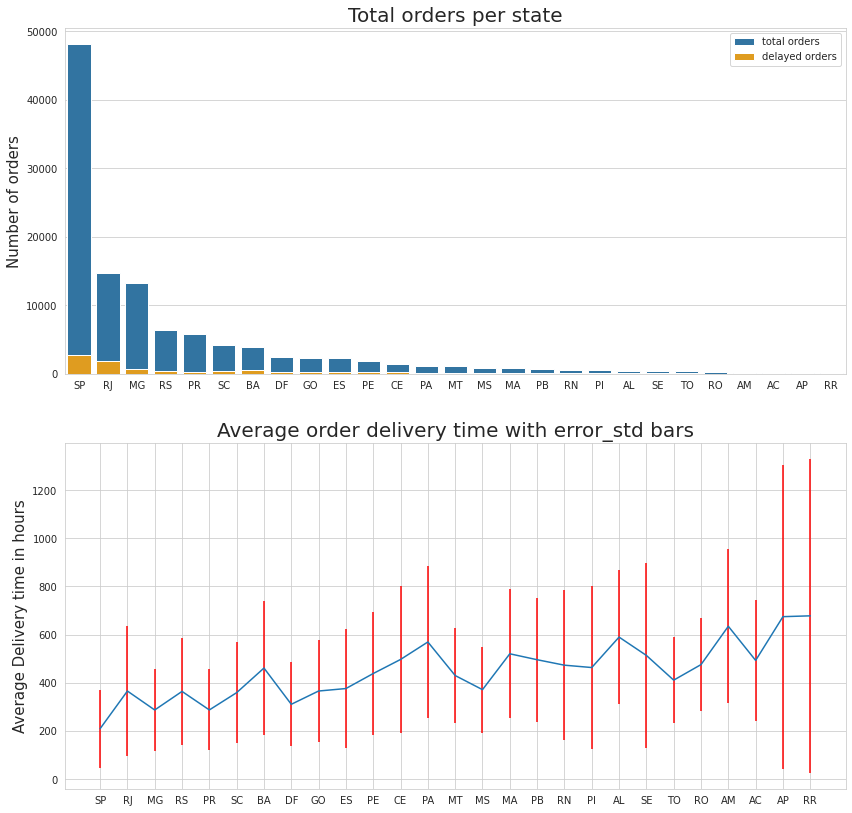

In [209]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(14,14))

# plot total orders and delayed orders
plt.subplot(ax1)
sns.countplot(data=final,x='customer_state',color=basecolor,ax=ax1,order=final["customer_state"].value_counts().index,label='total orders');

final_e=final.query('order_delivered_customer_date > order_estimated_delivery_date')
sns.countplot(data=final_e,x='customer_state',color='orange',ax=ax1,order=final["customer_state"].value_counts().index, label='delayed orders');
ax1.legend();
plt.title('Total orders per state',fontsize=20);
plt.ylabel('Number of orders',fontsize=15);
plt.xlabel('');


# plot average time with std_error lines
plt.subplot(ax2)
plt.errorbar(data.customer_state,data.mean_derivery_time,ecolor='red',yerr=data.std_derivery_time);
plt.title('Average order delivery time with error_std bars',fontsize=20);
plt.ylabel('Average Delivery time in hours',fontsize=15)

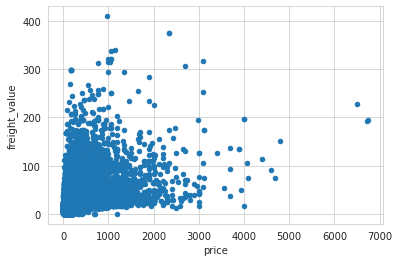

In [210]:
final.plot(kind = 'scatter',x = 'price',y = 'freight_value',)

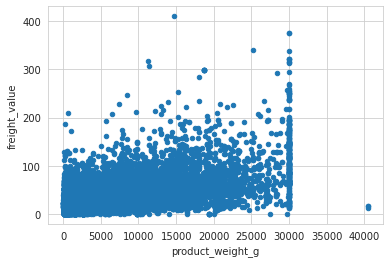

In [211]:
#Relation freight_value vs product_weight_g
final.plot(
    kind = 'scatter',
    x = 'product_weight_g',
    y = 'freight_value',
)

##Covariance

In [212]:
def add_colour(val):
  if val < 0:
    color = 'red'
  else:
    color = 'green'      
  return 'color: %s' % color

cov = final.cov().style.applymap(add_colour)
cov

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,Year,delivery_time
customer_zip_code_prefix,890987457.614321,-1078.662004,-597.870027,4802.317171,418809.336192,-12.863020,227441.498083,105815.359581,4818.246414,472171.765400,1081.273758,119425.969731,1754.077836,4677.937342,-3561.002730,61519352.567391,-505.424265,1835222.032278
review_score,-1078.662004,1.843675,0.005495,-0.164697,-30.296751,-0.132476,0.471678,-0.732858,-0.175674,12.184492,0.050132,-140.410401,-0.458467,-0.433442,-0.196617,1008.980184,-0.009912,-93.652060
payment_sequential,-597.870027,0.005495,0.468608,-0.167610,-11.924081,-0.000415,0.017497,0.082001,-0.015357,-4.681252,-0.009904,65.404410,0.330243,0.183276,0.239364,86.461169,-0.015323,0.375957
payment_installments,4802.317171,-0.164697,-0.167610,7.738147,202.715820,0.145733,141.261125,8.146259,0.591975,65.106006,-0.003907,1878.915850,5.250068,4.519772,4.483753,2932.165565,-0.072171,27.931713
payment_value,418809.336192,-30.296751,-11.924081,202.715820,70810.631398,50.059587,35729.568078,1558.599730,11.862732,27187.526422,4.725770,306776.131433,594.842755,775.605934,464.177263,512301.812536,0.705268,3598.911409
order_item_id,-12.863020,-0.132476,-0.000415,0.145733,50.059587,0.494467,-7.748533,-0.336879,-0.165157,-6.528241,-0.065396,-9.044220,0.067497,0.288129,-0.075243,-378.654107,0.001091,-2.682607
price,227441.498083,0.471678,0.017497,141.261125,35729.568078,-7.748533,33253.942259,1190.417016,36.185717,23826.334471,16.691456,233697.812532,421.094727,546.670965,370.316657,447499.527232,-0.055891,2522.557784
freight_value,105815.359581,-0.732858,0.082001,8.146259,1558.599730,-0.336879,1190.417016,247.347987,3.973394,972.388747,0.619644,36289.161609,77.193850,82.771020,59.543619,65538.248935,0.289959,759.760256
product_name_lenght,4818.246414,-0.175674,-0.015357,0.591975,11.862732,-0.165157,36.185717,3.973394,100.341749,589.468667,2.498081,847.138181,10.104289,-4.081208,7.451231,-8903.264426,0.093665,-6.605871
product_description_lenght,472171.765400,12.184492,-4.681252,65.106006,27187.526422,-6.528241,23826.334471,972.388747,589.468667,423271.213948,133.216944,146227.210315,35.650436,644.853310,-530.140753,1099098.914601,12.378145,834.219566
